<a href="https://colab.research.google.com/github/sebasbrowar/FisicaComputacional1/blob/main/Actividad4/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Actividad 4}$

## $\text{Ejercicio 1 - Exploración general de un DataFrame}$

$\text{Creamos un nuevo DataFrame modificando el original que ya teníamos, a continuación se muestra la lista de modificaciones que debemos realizar.}$
$\text{Modificaciones:}$
1.   $\text{Crear las columnas necesarias: Fecha, Precip, Evap, Tmax y Tmin.}$
2.   $\text{Especificar los códigos ASCII extendido (Español) con encoding='cp1251'.}$
3.   $\text{Seleccionar el separador de datos, sep='\s+'.}$
4.   $\text{Se deben ignorar los primeros 19 renglones y el último, tampoco habrá encabezado, funciones: header=None, skiprows=19, skipfooter=1.}$
5.   $\text{Los datos se procesan utilizando Python, engine='python'.}$
6.   $\text{Reemplazamos los textos 'Nulo' por espacio en blanco '', replace}$
7.   $\text{Los valores de las variables ambientales deben de ser números flotantes, pd.to_numeric}$
8.   $\text{Convertimos la cadena Fecha en tipo datetime64[ns] con la función pd.to_datetime}$
9.   $\text{Añadimos dos columnas adicionales: df['Año'], df['Mes'], con las funciones .dt.year y .dt.month se extraen el Año y Mes de la Fecha}$
10.   $\text{Seguidamente cambiamos la columna mes recién creada, usamos la función .dt.strftime('%b') para que los meses aparezcan como caracteres y no números.}$




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

url = 'https://raw.githubusercontent.com/sebasbrowar/FisicaComputacional1/main/Actividad4/2038.txt' # DataFrame original, sacado de github

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28868 entries, 0 to 28867
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   28868 non-null  datetime64[ns]
 1   Precip  28843 non-null  float64       
 2   Evap    28117 non-null  float64       
 3   Tmax    28727 non-null  float64       
 4   Tmin    28756 non-null  float64       
 5   Año     28868 non-null  int64         
 6   Mes     28868 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.5 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-01-01     0.0  11.0   NaN   NaN  1929    1
1 1929-01-02     0.0   5.0  23.5   8.0  1929    1
2 1929-01-03     0.0   1.0  19.0   4.0  1929    1
3 1929-01-04     0.0   3.0  18.5   6.5  1929    1
4 1929-01-05     0.0   4.0  20.0   2.0  1929    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
28863 2012-12-27     0.0   0.4  17.0   9.0  2012   12
28864 2012-12-28   

In [28]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28868 entries, 0 to 28867
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   28868 non-null  datetime64[ns]
 1   Precip  28843 non-null  float64       
 2   Evap    28117 non-null  float64       
 3   Tmax    28727 non-null  float64       
 4   Tmin    28756 non-null  float64       
 5   Año     28868 non-null  int64         
 6   Mes     28868 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-01-01     0.0  11.0   NaN   NaN  1929  Jan
1 1929-01-02     0.0   5.0  23.5   8.0  1929  Jan
2 1929-01-03     0.0   1.0  19.0   4.0  1929  Jan
3 1929-01-04     0.0   3.0  18.5   6.5  1929  Jan
4 1929-01-05     0.0   4.0  20.0   2.0  1929  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
28863 2012-12-27     0.0   0.4  17.0   9.0  2012  Dec
28864 2

## $\text{Ejercicio 2 - Histogramas}$

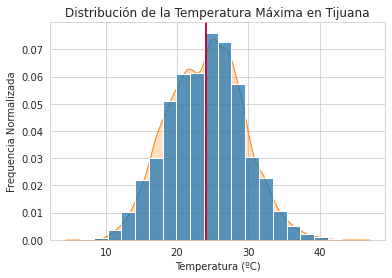

In [29]:
# Histograma y función de densidad de probabilidad para las temperaturas máximas 
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density'); # Histograma
sns.kdeplot(df_meteo.Tmax, fill=True); # Función de densidad de probabilidad o KDE (Kernel Density Estimate)

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'r');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Tijuana')

plt.show()

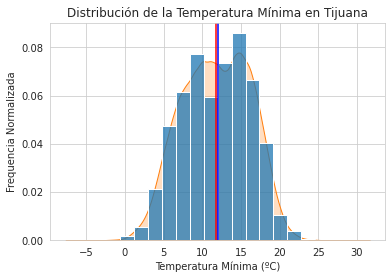

In [30]:
# Histograma y función de densidad de probabilidad para las temperaturas mínimas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density'); # Histograma
sns.kdeplot(df_meteo.Tmin, fill=True); # Función de densidad de probabilidad o KDE (Kernel Density Estimate)

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'r');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Tijuana')

plt.show()

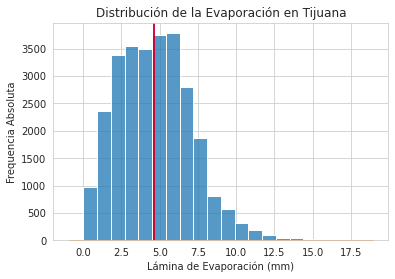

In [31]:
# Histograma y función de densidad de probabilidad para la evaporación
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Evap', bins=20); # Histograma
sns.kdeplot(df_meteo.Evap, fill=True); # Función de densidad de probabilidad o KDE (Kernel Density Estimate)

# Definimos las cantidades específica: Promedio y Mediana
Ev_med = df_meteo.Evap.median() 
Ev_prom = df_meteo.Evap.mean()
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Ev_med, color = 'b', label = 'm') 
plt.axvline(x = Ev_prom, color = 'r', label = 'x')

plt.xlabel('Lámina de Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en Tijuana')

plt.show()

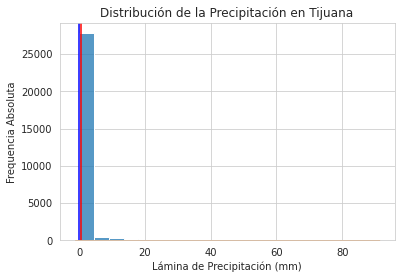

In [32]:
# Histograma y función de densidad de probabilidad para la precipitación
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Precip', bins=20); # Histograma
sns.kdeplot(df_meteo.Precip, fill=True); # Función de densidad de probabilidad o KDE (Kernel Density Estimate)

# Definimos las cantidades específica: Promedio y Mediana
Pr_med = df_meteo.Precip.median() 
Pr_prom = df_meteo.Precip.mean()
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Pr_med, color = 'b', label = 'm') 
plt.axvline(x = Pr_prom, color = 'r', label = 'x')

plt.xlabel('Lámina de Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Precipitación en Tijuana')

plt.show()

## $\text{Ejercicio 3 - Gráficas de Cajas (Boxplot)}$

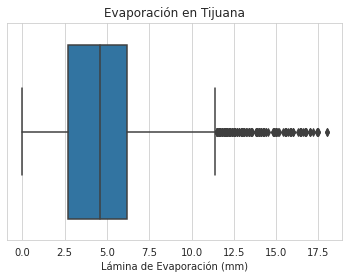

In [33]:
# Gráfica de Cajas (BoxPlots) de evaporación, utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Lámina de Evaporación (mm)', 
                                                     title='Evaporación en Tijuana');

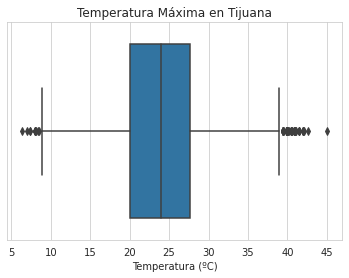

In [34]:
# Gráfica de Cajas (BoxPlots) de temperatura máxima, utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Tijuana');

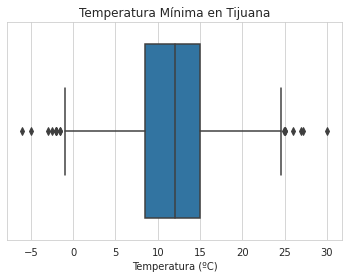

In [35]:
# Gráfica de Cajas (BoxPlots) de temperatura mínima, utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Tijuana');

## $\text{Ejercicio 4 - Gráficas de Barras para la Precipitación}$

In [36]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2013)]

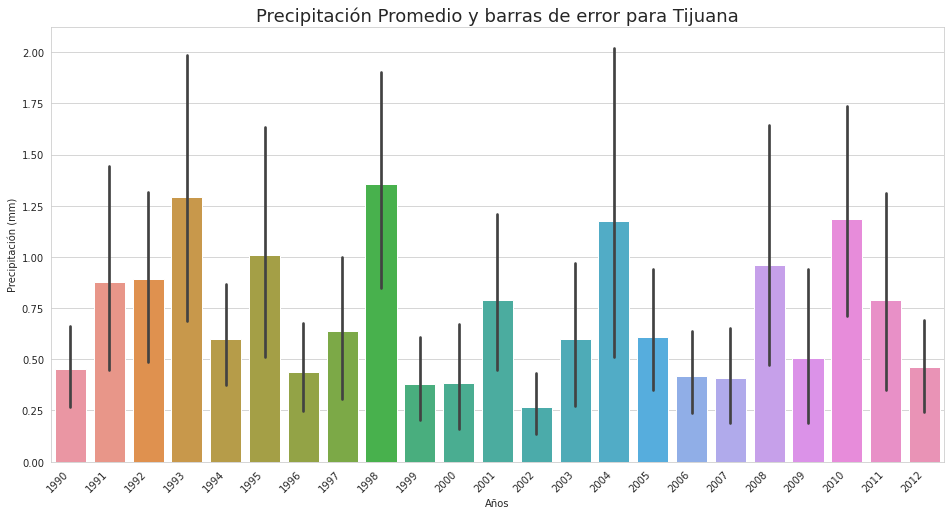

In [37]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90); # Gráfica de barras
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Tijuana', fontsize=18)

plt.show()

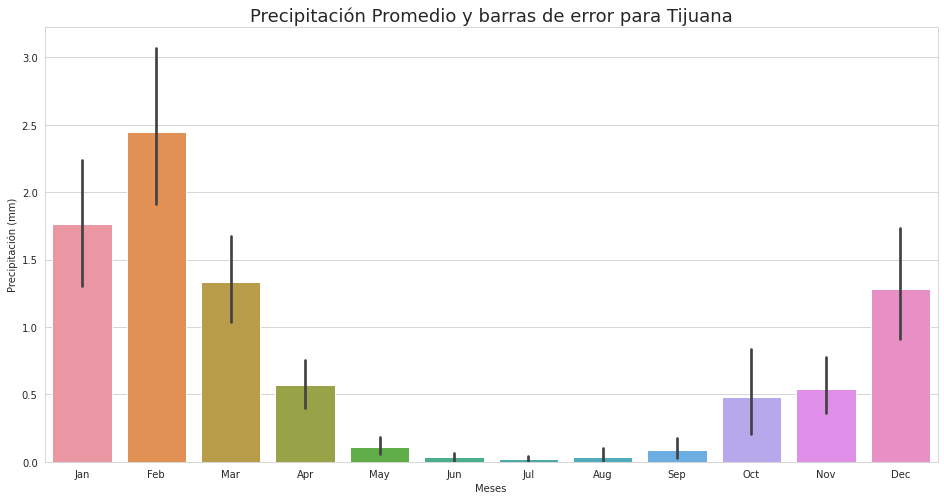

In [38]:
# Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90); # Gráfica de barras
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Tijuana', fontsize=18)

plt.show()

## $\text{Ejercicio 5 - Gráficas de Línea}$

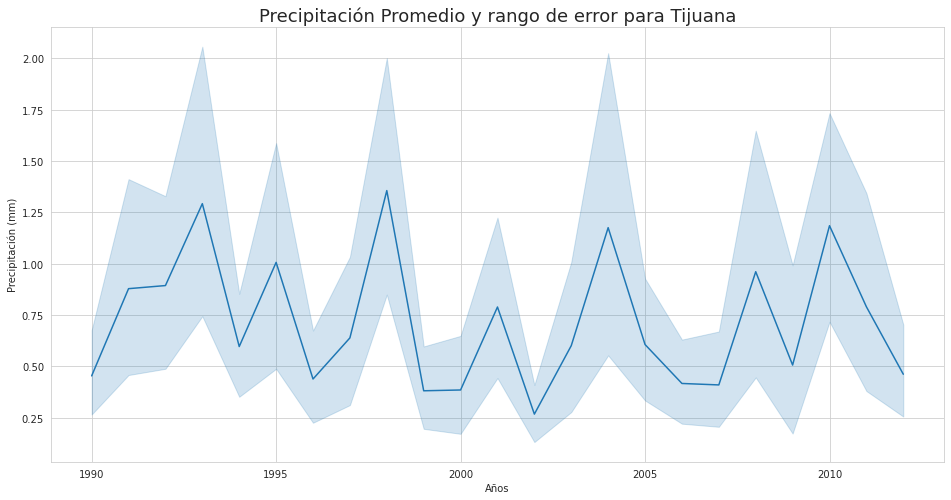

In [40]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90); # Gráfica de línea
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Tijuana', fontsize=18)

plt.show()

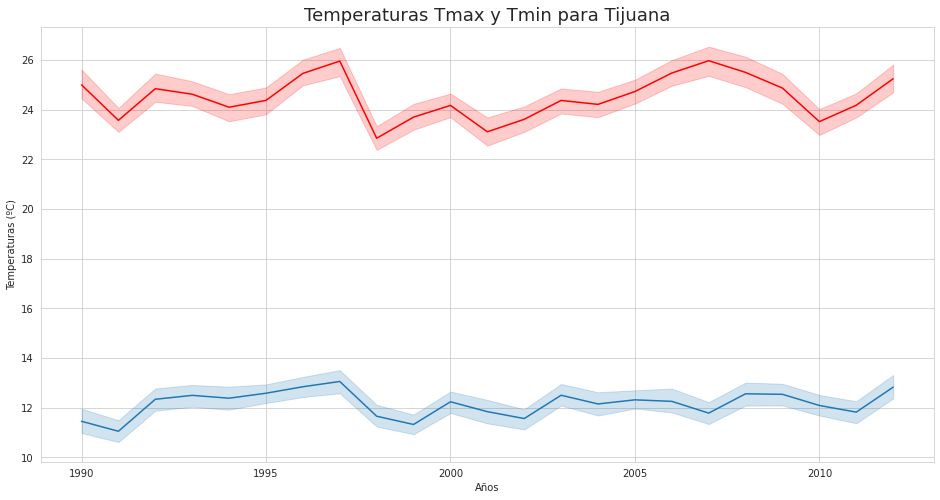

In [39]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r'); # Gráfica de línea Tmax
sns.lineplot(x='Año', y='Tmin', data=df_90); # Gráfica de línea Tmin

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Tijuana', fontsize=18)

plt.show()

## $\text{Ejercicio 6 - Diagramas de Cajas}$

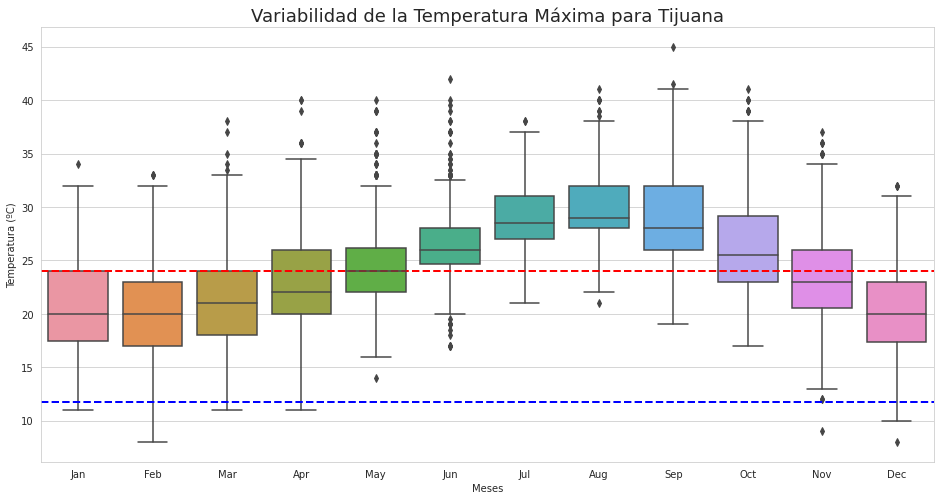

mean(Tmax) =  23.990597695547535
mean(Tmin) =  11.752166504381535
Diff Tmax_ave-Tmin_ave =  12.238431191166


In [42]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Tijuana', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

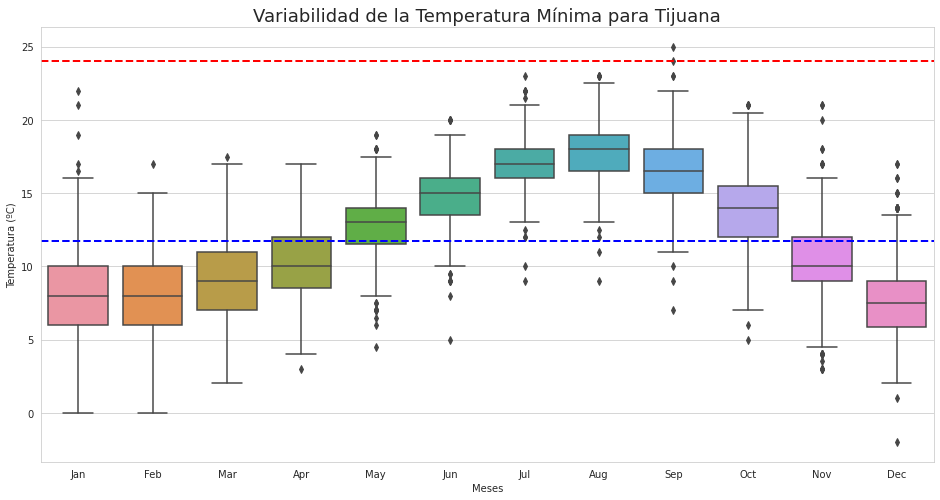

mean(Tmax) =  23.990597695547535
mean(Tmin) =  11.752166504381535
Diff Tmax_ave-Tmin_ave =  12.238431191166


In [43]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Tijuana', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

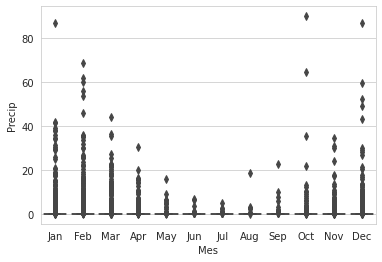

In [44]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);